## K-Means Clustering

In [1]:
!pip install ../testclustering-0.1-py3-none-any.whl
!if [ ! -d ../.ans ]; then mkdir ../.ans; fi

Processing e:\machinelearning\machinelearning\datasciencee2\sprint4_assessment\testclustering-0.1-py3-none-any.whl


! was unexpected at this time.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import scipy 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [81]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### DataSet

**Dataset Path:** ../dataset/CC GENERAL.csv

**In this scenario, Let us develop a customer segmentation for Credit Card Dataset Using K-Means Clustering.** The sample Dataset summarizes the usage behavior of about 8950 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**CUST_ID** : Identification of Credit Card holder (Categorical)  
**BALANCE** : Balance amount left in their account to make purchases   
**BALANCE_FREQUENCY** : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)   
**PURCHASES** : Amount of purchases made from account   
**ONEOFF_PURCHASES** : Maximum purchase amount done in one-go   
**INSTALLMENTS_PURCHASES** : Amount of purchase done in installment   
**CASH_ADVANCE** : Cash in advance given by the user   
**PURCHASES_FREQUENCY** : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)    
**ONEOFFPURCHASESFREQUENCY** : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)      
**PURCHASESINSTALLMENTSFREQUENCY** : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)     
**CASHADVANCEFREQUENCY** : How frequently the cash in advance being paid   
**CASHADVANCETRX** : Number of Transactions made with "Cash in Advanced"    
**PURCHASES_TRX** : Numbe of purchase transactions made    
**CREDIT_LIMIT** : Limit of Credit Card for user      
**PAYMENTS** : Amount of Payment done by user     
**MINIMUM_PAYMENTS** : Minimum amount of payments made by user      
**PRCFULLPAYMENT** : Percent of full payment paid by user   
**TENURE** : Tenure of credit card service for user

### Reading and Understanding Data

In [82]:
#read csv data and store into dataframe
df=pd.read_csv('../dataset/CC GENERAL.csv')
#df.head()
print(df)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

In [83]:
#take copy of original data 
df1=df

In [84]:
#Find Shape
print(df.shape)
#Analyse the Summary of the Dataset
df.describe()

(8950, 18)


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [85]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [86]:
#df1.isnull().sum()
df1.mean()

BALANCE                             1564.474828
BALANCE_FREQUENCY                      0.877271
PURCHASES                           1003.204834
ONEOFF_PURCHASES                     592.437371
INSTALLMENTS_PURCHASES               411.067645
CASH_ADVANCE                         978.871112
PURCHASES_FREQUENCY                    0.490351
ONEOFF_PURCHASES_FREQUENCY             0.202458
PURCHASES_INSTALLMENTS_FREQUENCY       0.364437
CASH_ADVANCE_FREQUENCY                 0.135144
CASH_ADVANCE_TRX                       3.248827
PURCHASES_TRX                         14.709832
CREDIT_LIMIT                        4494.449450
PAYMENTS                            1733.143852
MINIMUM_PAYMENTS                     864.206542
PRC_FULL_PAYMENT                       0.153715
TENURE                                11.517318
dtype: float64

### Data Cleaning
 
**Question 1:** Find the null values in the dataframe and replace with thier means

Assign the final cleaned DataFrame to the variable **`a1`**

In [87]:
#Replace null with values with means
df1=df1.fillna(df1.mean())
a1 = df1.copy()

In [88]:
a1.isnull().sum()
print(df1)

     CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0       

-----------

In [89]:
#drop customer id column
df1=df1.drop('CUST_ID',axis=1)

In [90]:
#Sort the data frame based on the column name
df1 = df1.sort_index(axis=1)

**Question 2:** Find all the variables contains outliers in the dataframe (Use: IQR Way)

Assign the all variable list to the variable **`a2`**

In [91]:
#Find the outliers
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
### Enter code below
a2 = df1.columns[((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=0)].tolist()
### End code
a2

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
CASH_ADVANCE                        1113.821139
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
CREDIT_LIMIT                        4900.000000
INSTALLMENTS_PURCHASES               468.637500
MINIMUM_PAYMENTS                     693.348888
ONEOFF_PURCHASES                     577.405000
ONEOFF_PURCHASES_FREQUENCY             0.300000
PAYMENTS                            1517.858151
PRC_FULL_PAYMENT                       0.142857
PURCHASES                           1070.495000
PURCHASES_FREQUENCY                    0.833334
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
PURCHASES_TRX                         16.000000
TENURE                                 0.000000
dtype: float64


['BALANCE',
 'BALANCE_FREQUENCY',
 'CASH_ADVANCE',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'CREDIT_LIMIT',
 'INSTALLMENTS_PURCHASES',
 'MINIMUM_PAYMENTS',
 'ONEOFF_PURCHASES',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PAYMENTS',
 'PRC_FULL_PAYMENT',
 'PURCHASES',
 'PURCHASES_TRX',
 'TENURE']

Summary

- As you can see, There are many outliers. But, we can't simply drop the outliers as they may contain useful information. So, we'll treat them as extreme values (Because, most of the variables are currency based units).

- Already we know that outliers will effect the clusters. For now, we`ll do nothing with outliers because this may harm the clustering.

--------------

To avoid the outliers(Skewed data), Lets use 

- Log transformation



### Data Transformation

**Question 3:** Transform all variables in the dataframe and replace with log transform values. (Use: Natural Logrithmic $log(1+x)$)

Assign the final transformed DataFrame to the variable **`a3`**

In [92]:
#Transform all variables
#Log Transformation, log(1+x)
df1.astype('float')
for column in df1.columns:
   df1[column] = np.log(df1[column])
a3 = df1
a3

E:\MachineLearning\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,BALANCE,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,MINIMUM_PAYMENTS,ONEOFF_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PAYMENTS,PRC_FULL_PAYMENT,PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,TENURE
0,3.711148,-0.200670,-inf,-inf,-inf,6.907755,4.558079,4.938135,-inf,-inf,5.307287,-inf,4.558079,-1.791757,-2.484911,0.693147,2.484907
1,8.071677,-0.095310,8.770741,-1.386294,1.386294,8.853665,-inf,6.977599,-inf,-inf,8.319482,-1.504078,-inf,-inf,-inf,-inf,2.484907
2,7.822104,0.000000,-inf,-inf,-inf,8.922658,-inf,6.441401,6.650499,0.000000,6.433047,-inf,6.650499,0.000000,-inf,2.484907,2.484907
3,7.418583,-0.451985,5.326847,-2.484911,0.000000,8.922658,-inf,6.761812,7.312553,-2.484911,-inf,-inf,7.312553,-2.484911,-inf,0.000000,2.484907
4,6.706513,0.000000,-inf,-inf,-inf,7.090077,-inf,5.500406,2.772589,-2.484911,6.519641,-inf,2.772589,-2.484911,-inf,0.000000,2.484907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,3.349677,0.000000,-inf,-inf,-inf,6.907755,5.673736,3.889499,-inf,-inf,5.785653,-0.693147,5.673736,0.000000,-0.182322,1.791759,1.791759
8946,2.954036,0.000000,-inf,-inf,-inf,6.907755,5.703782,6.761812,-inf,-inf,5.619898,-inf,5.703782,0.000000,-0.182322,1.791759,1.791759
8947,3.152679,-0.182322,-inf,-inf,-inf,6.907755,4.972587,4.411808,-inf,-inf,4.397786,-1.386294,4.972587,-0.182322,-0.405465,1.609438,1.791759
8948,2.599541,-0.182322,3.598921,-1.791757,0.693147,6.214608,-inf,4.020978,-inf,-inf,3.961764,-1.386294,-inf,-inf,-inf,-inf,1.791759


### Data Visualization

**Question 4:** Plot the graph it should show that how the data is distributed over the all Variable (Hint: Use Box Plot)   

<a href="../expected_img/expected_boxplot_outliers.png">Expected Boxplot</a>

E:\MachineLearning\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
E:\MachineLearning\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
E:\MachineLearning\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
E:\MachineLearning\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],


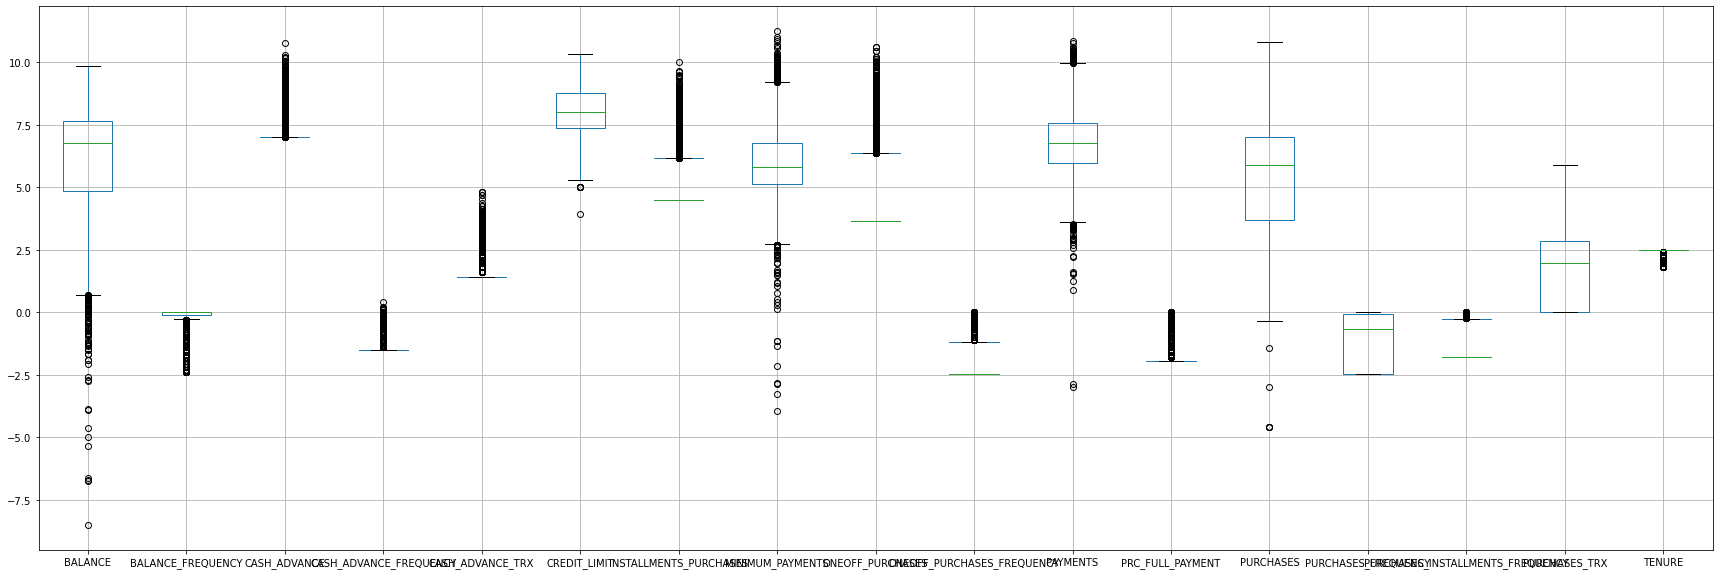

In [93]:
# Using boxplot for indentify possible outliers values after log-transform. (Note rotate the box plot into 90 degree)
### Don't remove any code given below. Enter your code in the appropriate section
f1, ax1 = plt.subplots(1,1, figsize = (30, 10))

### Enter code below
ax1 = df1.boxplot(ax=ax1)
plt.show()
### End code

**Note: Still data contains some outliers. Let it be, We aren't going change anything.**

### Feature Engineering and Selection

<AxesSubplot:>

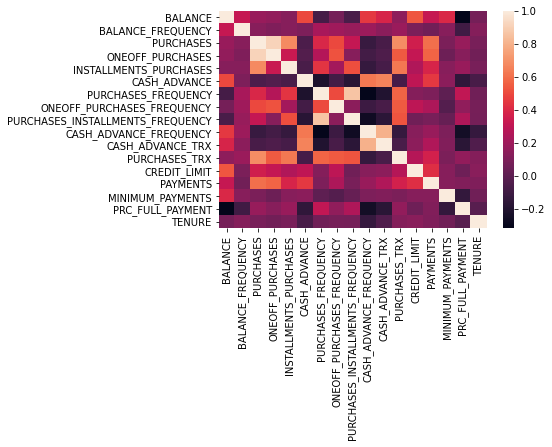

In [94]:
#Plot Heatmap and See correlation between variables
sns.heatmap(df.corr())


**Question 5**: Find out the highly correlated variables each other. Find all variable pairs that have greater than a **0.7** correlation coefficient.

Ex: If (X,Y) correlation coefficient is 0.7 and (X,Z) correlation coefficient is 0.7 then store [X, Y, Z] only. Second correlation has X, Z but X is already highly correlated with Y. So, Don't Repeat X again.

Assign the correlated variables as list to the variable **`a4`**

In [95]:
#Find all variable pairs that have greater than a **0.7** correlation coefficient. (Use: corr function)
#print(df.corr().abs().unstack().sort_values().drop_duplicates()>.7)
corr=df1.corr()
df_corr =(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.70).any()
df_corr=df_corr.reset_index()
df_corr_true=df_corr[df_corr[0=='True']]


a4 = df_corr_true['index'].values.tolist()

print(a4)

['BALANCE', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'INSTALLMENTS_PURCHASES', 'MINIMUM_PAYMENTS', 'ONEOFF_PURCHASES', 'PURCHASES', 'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'PURCHASES_TRX']


**Standardization**

In [96]:
# Select those best features and store into seperate variable `X`
X = df[['CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY',
             'PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
             'ONEOFF_PURCHASES', 'PURCHASES']]

#Let us do Standardization for selected features and store into seperate variable
sc = StandardScaler()
sc_data = sc.fit_transform(X)
sc_data


array([[-0.47606982, -0.67534886, -0.80649035, -0.70731317, -0.35693402,
        -0.42489974],
       [ 0.11007385,  0.57396272, -1.22175806, -0.91699519, -0.35693402,
        -0.46955188],
       [-0.47606982, -0.67534886,  1.26984323, -0.91699519,  0.10888851,
        -0.10766823],
       ...,
       [-0.47606982, -0.67534886,  0.85457552,  0.76046857, -0.35693402,
        -0.40196519],
       [-0.18299798,  0.15752719, -1.22175806, -0.91699519, -0.35693402,
        -0.46955188],
       [-0.18299798,  0.99039825,  0.4393103 , -0.91699519,  0.30173158,
         0.04214581]])

**Question 6**   
i) Find the optimal cluster `n`. Take a range from (1, 20) from which n is optimal cluster for K-Means Clustering. Set `random_state=42` while build cluster. **(Use Elbow Method)**   
ii) Plot the graph which show how SSE square decrease when n clusters increased. (Use line plot)

Assign optimal cluster `n` value as int to the variable **`a5`** 

<a href="../expected_img/expected_lineplot_elbow.png">Expected Line Plot (Elbow Method)</a>

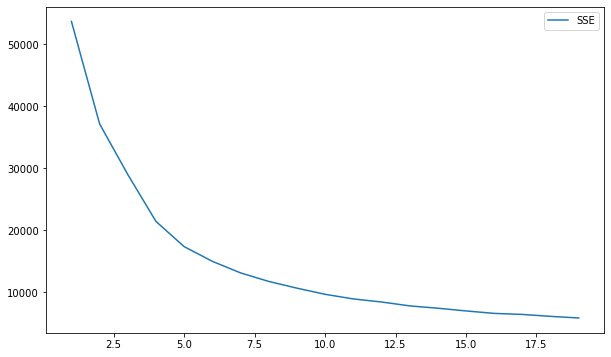

In [97]:
# Use the Elbow method to find a good number of clusters using WCSS
### Don't remove any code given below. Enter your code in the appropriate section
# Use init="k-means++", n_init=10, max_iter=300, random_state=42 as attributes for kmeans
f2, ax2 = plt.subplots(1, 1, figsize = (10, 6))

### Enter code below
sse = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=42,init='k-means++',n_init=10,max_iter=300)
    kmeanModel.fit(sc_data)
    sse.append(kmeanModel.inertia_)
plt.plot(K, sse)
plt.legend(['SSE'])
### Enter code below
#ax2 = _
plt.show()
### End code

a5 = 5

----------

### Clustering

In [98]:
# Create Kmeans Clustering based on optimal cluster `n` value
# Use init="k-means++", n_init=10, max_iter=300, random_state=42 as attributes for kmeans

model=KMeans(init="k-means++", n_init=10, max_iter=300, random_state=42,n_clusters=5)
kmodel = model.fit(sc_data)
labels = kmodel.fit_predict(sc_data)

In [99]:
#Create a new column and append clustered labels into original dataframe (Copied orginal dataframe)
label = kmodel.fit_predict(sc_data).tolist()
df['clusters']=label


### Interpretation of clusters

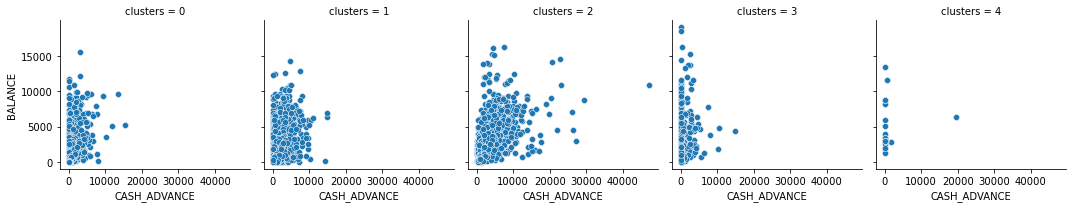

In [100]:
#Plot Facet Grid for each cluster.
g=sns.FacetGrid(df,col='clusters')
g.map(sns.scatterplot, "CASH_ADVANCE",'BALANCE')
g.map(sns.scatterplot, "CASH_ADVANCE",'BALANCE')

**Question 7**  

Find Appropriate Cluster    

1) In which cluster, The people are less interest to purchase using CC. The people mainting very good balance and frequently taking advance cash option.      
2) In Which cluster, The people are average interest to purchase using CC and. The people mainting very low balance and very low interested taking advance cash option. Average Payment CC Bills. They are average interest one go purchase

For ex: If answer is cluster 0 then assign the value 0 to the mentioned variables below.     

Assign Question 1 cluster label value as int to the variable `a6`   
Assign Question 2 cluster label value as int to the variable `a7`

In [104]:
print(df.groupby('clusters').mean())
a6, a7 =1,0

              BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
clusters                                                                   
0         1034.109181           0.923307   1122.530712        437.294522   
1         1350.204877           0.805404    296.289271        244.000025   
2         3572.175084           0.964761    481.009562        300.341803   
3         2814.795688           0.975022   6143.727051       4339.354979   
4         4961.573491           0.951948  28698.173810      23496.999524   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
clusters                                                              
0                     685.830653    295.995964             0.879206   
1                      52.444823    830.136464             0.167715   
2                     180.702341   4097.064093             0.273819   
3                    1804.372073    534.930583             0.910038   
4                    5201.174286   1062.5

--------

###  Run the below cells to save your answers

In [70]:
from testclustering import kmeans as kmeanstest
kmeanstest.save_question1(a1)
kmeanstest.save_question2(a2)
kmeanstest.save_question3(a3)
kmeanstest.save_question4(f1)
kmeanstest.save_question5(a4)
kmeanstest.save_question6(a5, f2)
kmeanstest.save_question7(a6, a7)